In [97]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing as MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  cross_val_score, train_test_split
from collections import Counter
import keras_tuner
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore') 

In [6]:
data = pd.read_csv("forestfires.csv")

In [7]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [10]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [11]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
data[data.duplicated()].shape

(8, 31)

In [14]:
# List of Numerical Variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
data[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [17]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [18]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [19]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(data[var].value_counts()/(len(data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [20]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [21]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


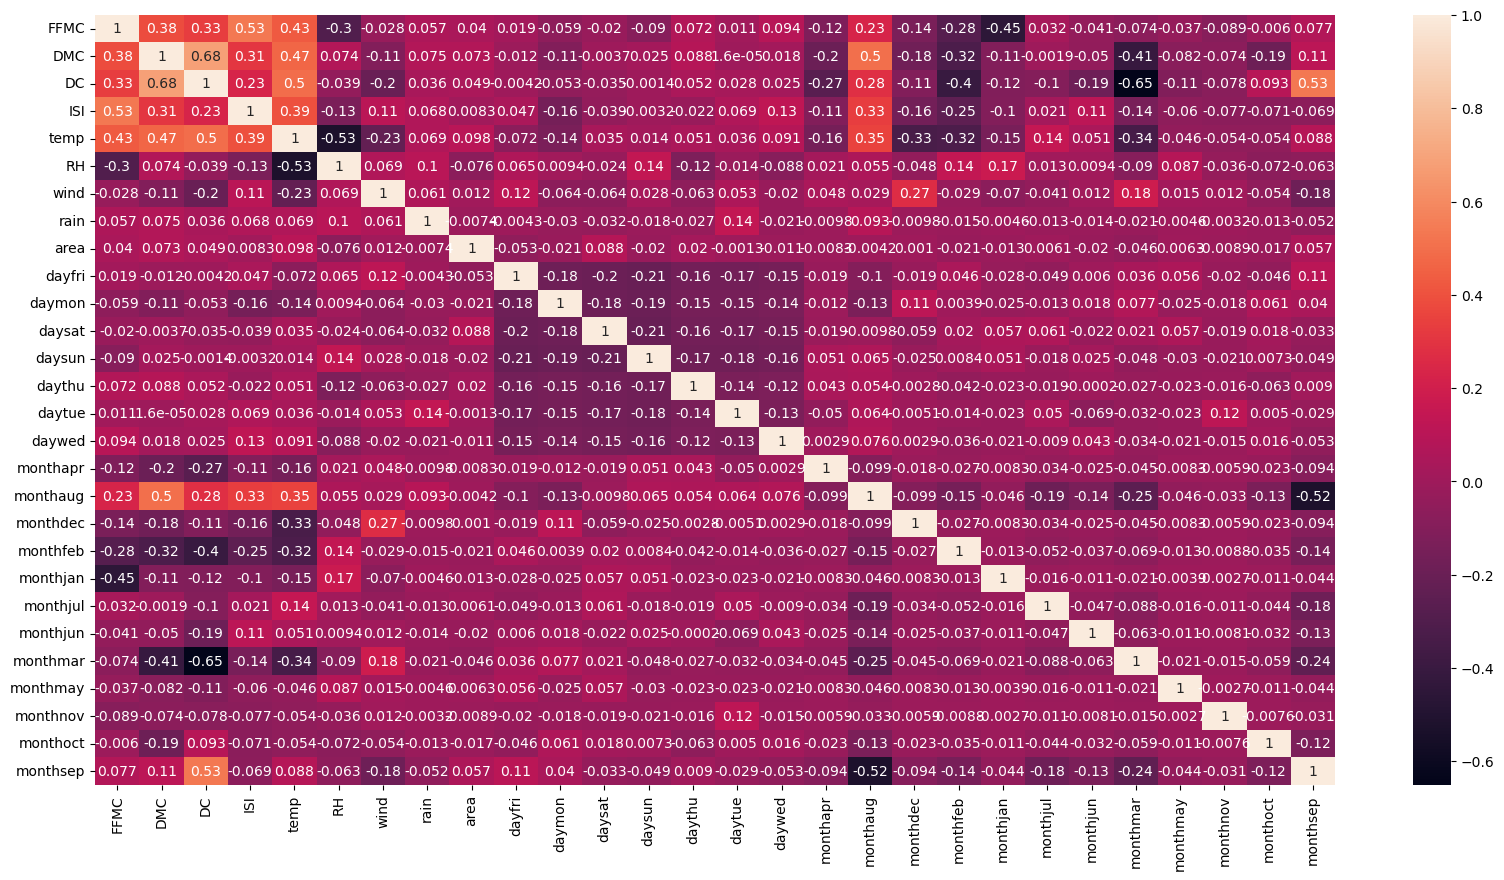

In [22]:
fig= plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True);
# plt.xticks(rotation=45)
plt.show()

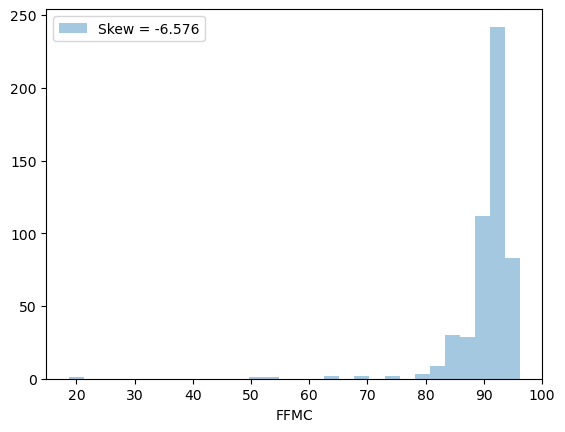

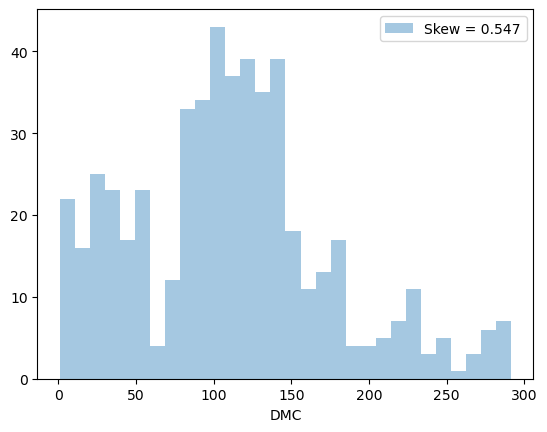

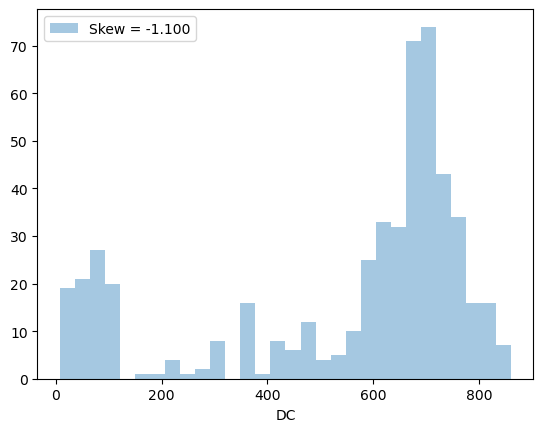

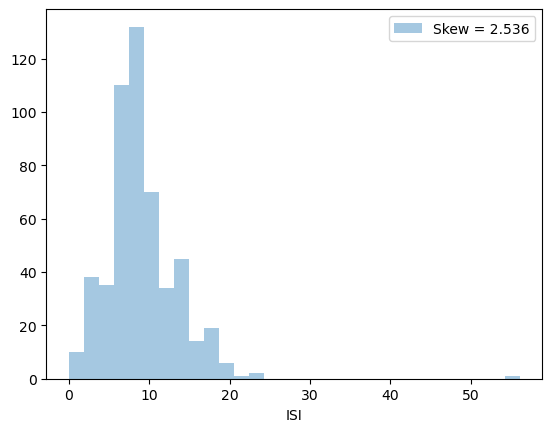

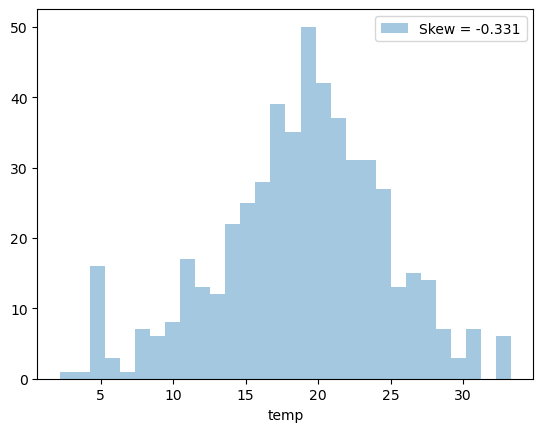

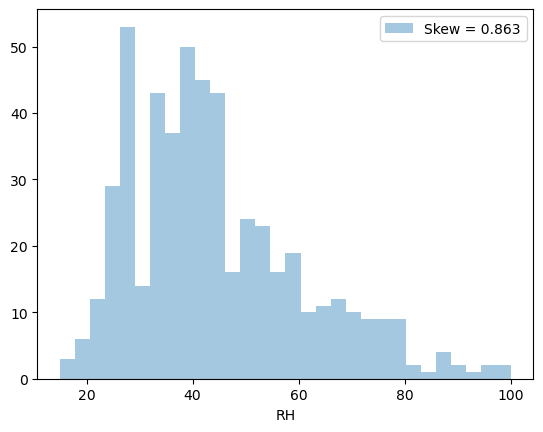

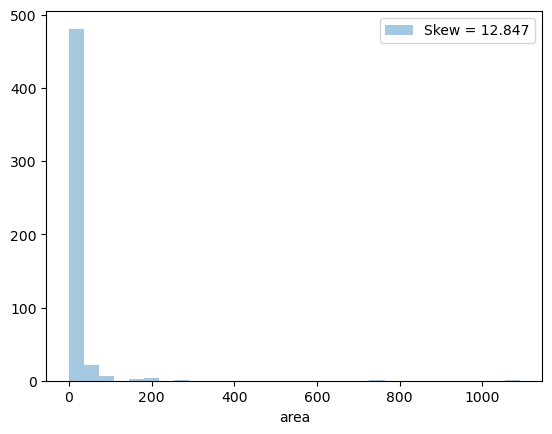

In [23]:
for feat in continuous_feature:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [24]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


In [25]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

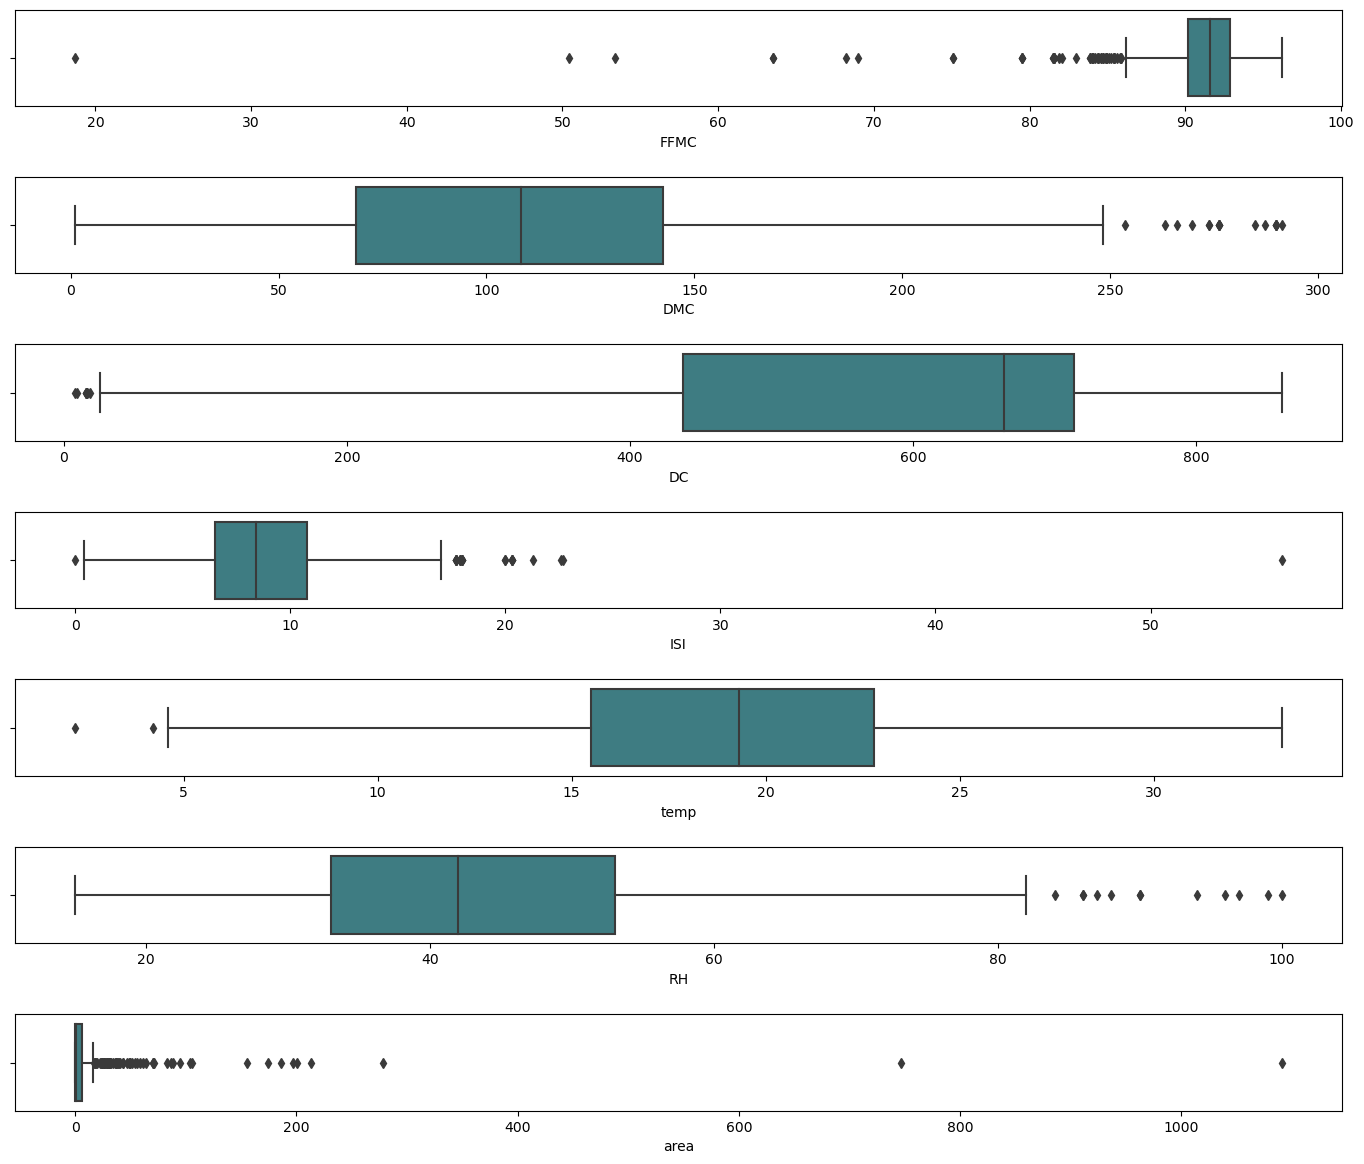

In [26]:
ot=data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

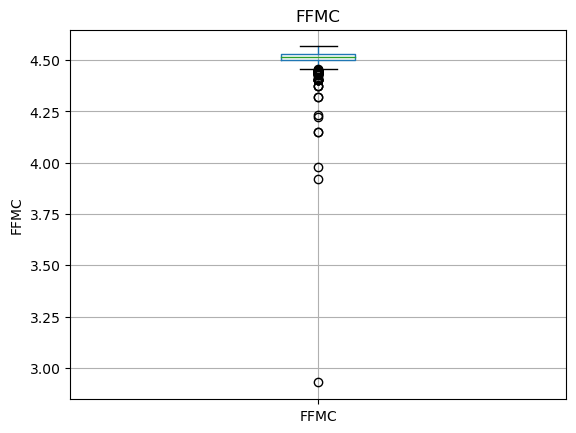

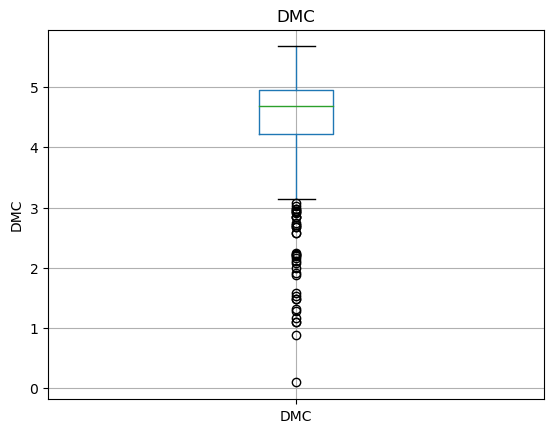

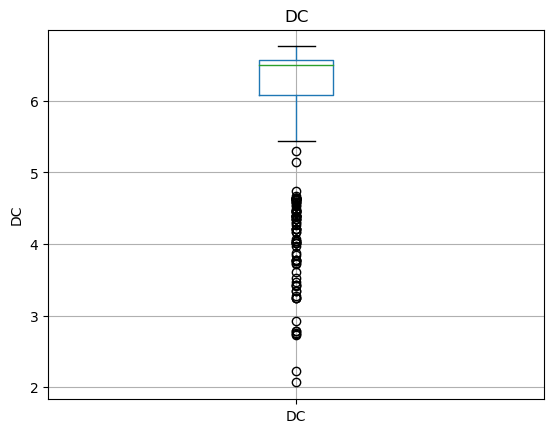

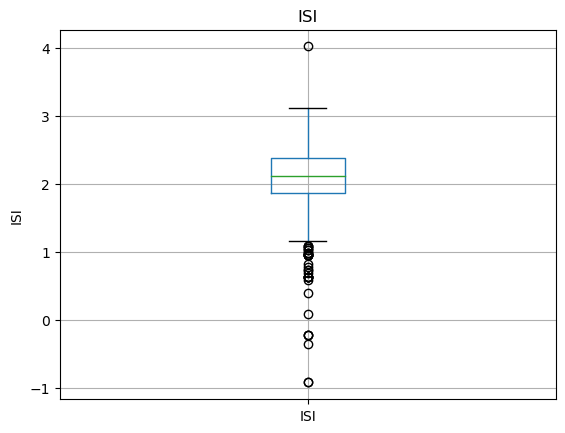

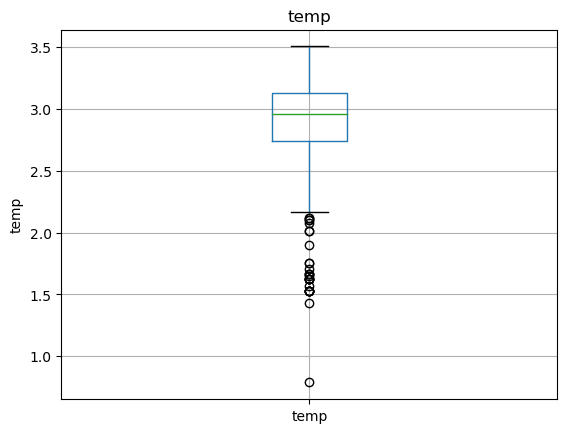

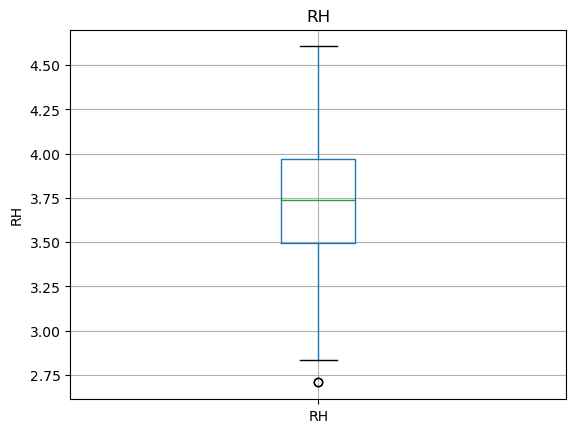

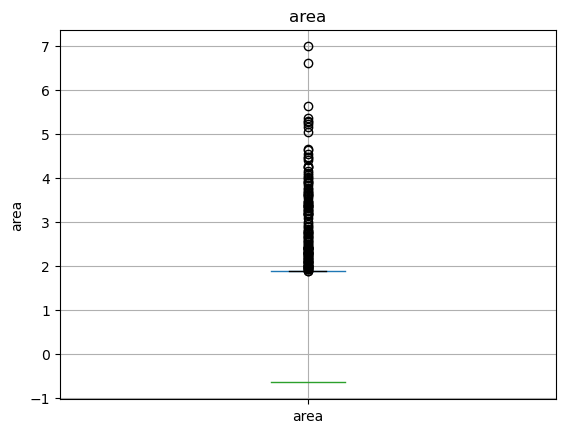

In [27]:
for feature in continuous_feature:
    data=data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: nan
Kurtosis: nan


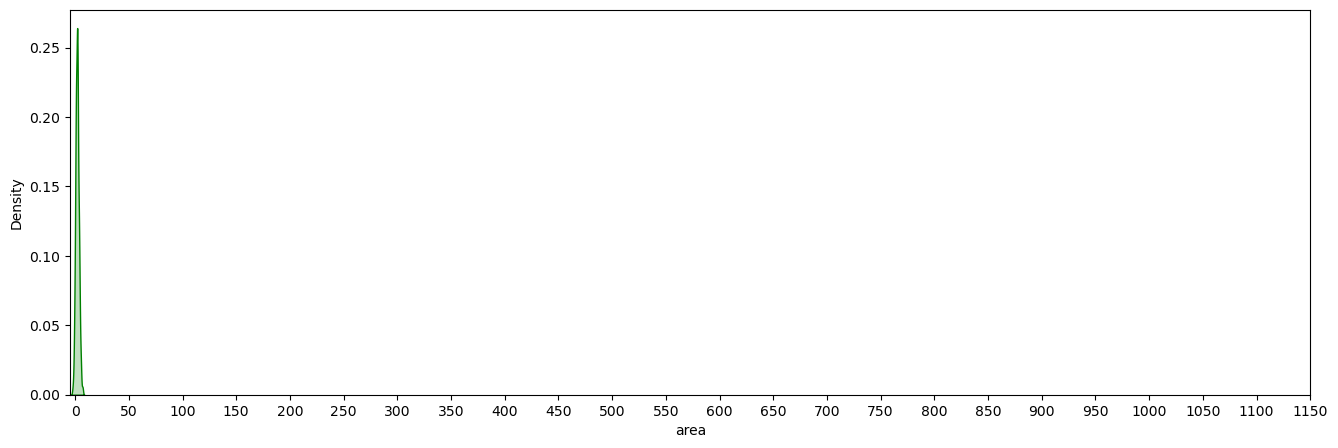

In [28]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

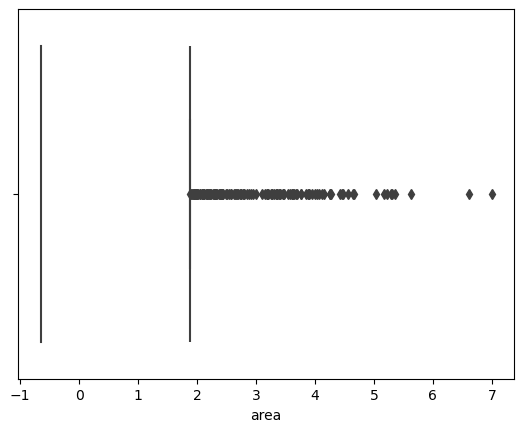

In [29]:
ax = sns.boxplot(data['area'])

In [30]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [31]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [32]:
# Decide which categorical variables you want to use in model
for feature in data.columns:
    if data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



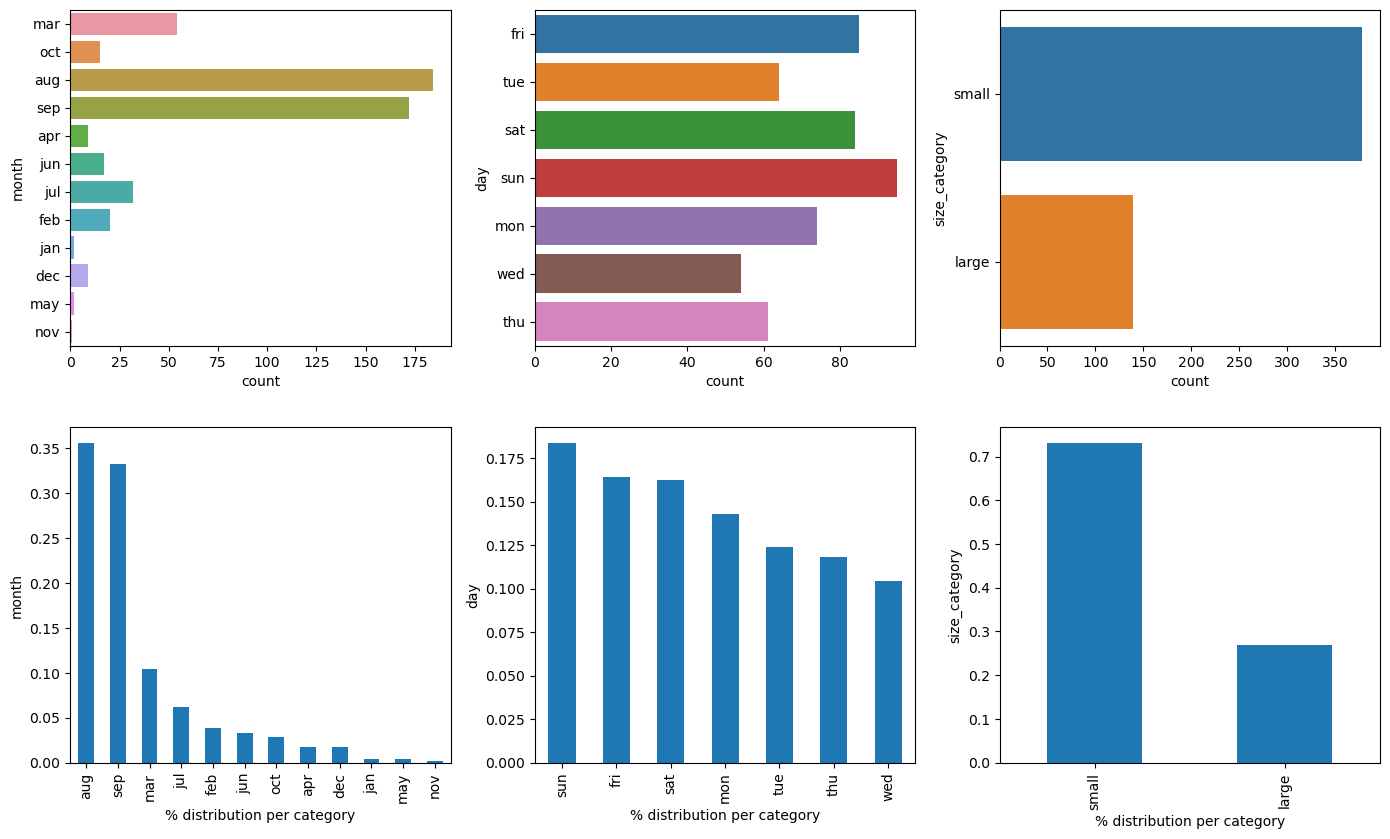

In [33]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=data,y=col)
    plt.subplot(3,3,i+3)
    data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [34]:
print(data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count    517.000000
mean           -inf
std             NaN
min            -inf
25%             NaN
50%       -0.653926
75%        1.882514
max        6.994703
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,damage_category
0,mar,fri,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,...,0,0,0,1,0,0,0,0,small,low
1,oct,tue,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,...,0,0,0,0,0,0,1,0,small,low
2,oct,sat,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,...,0,0,0,0,0,0,1,0,small,low
3,mar,fri,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,...,0,0,0,1,0,0,0,0,small,low
4,mar,sun,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,...,0,0,0,1,0,0,0,0,small,low


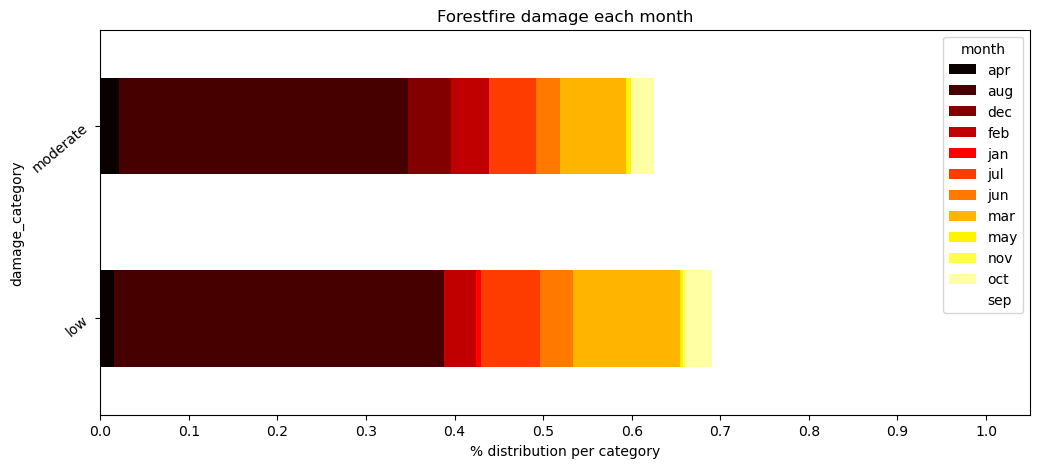

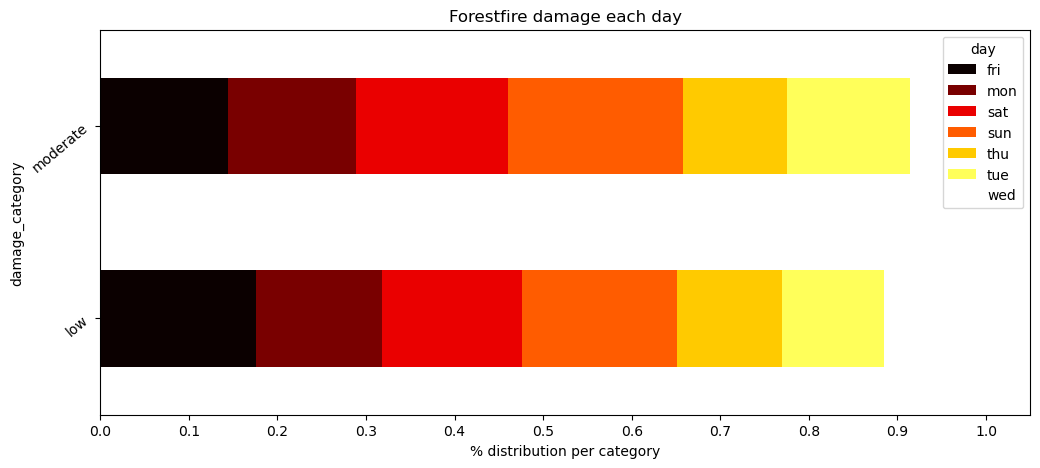

In [35]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

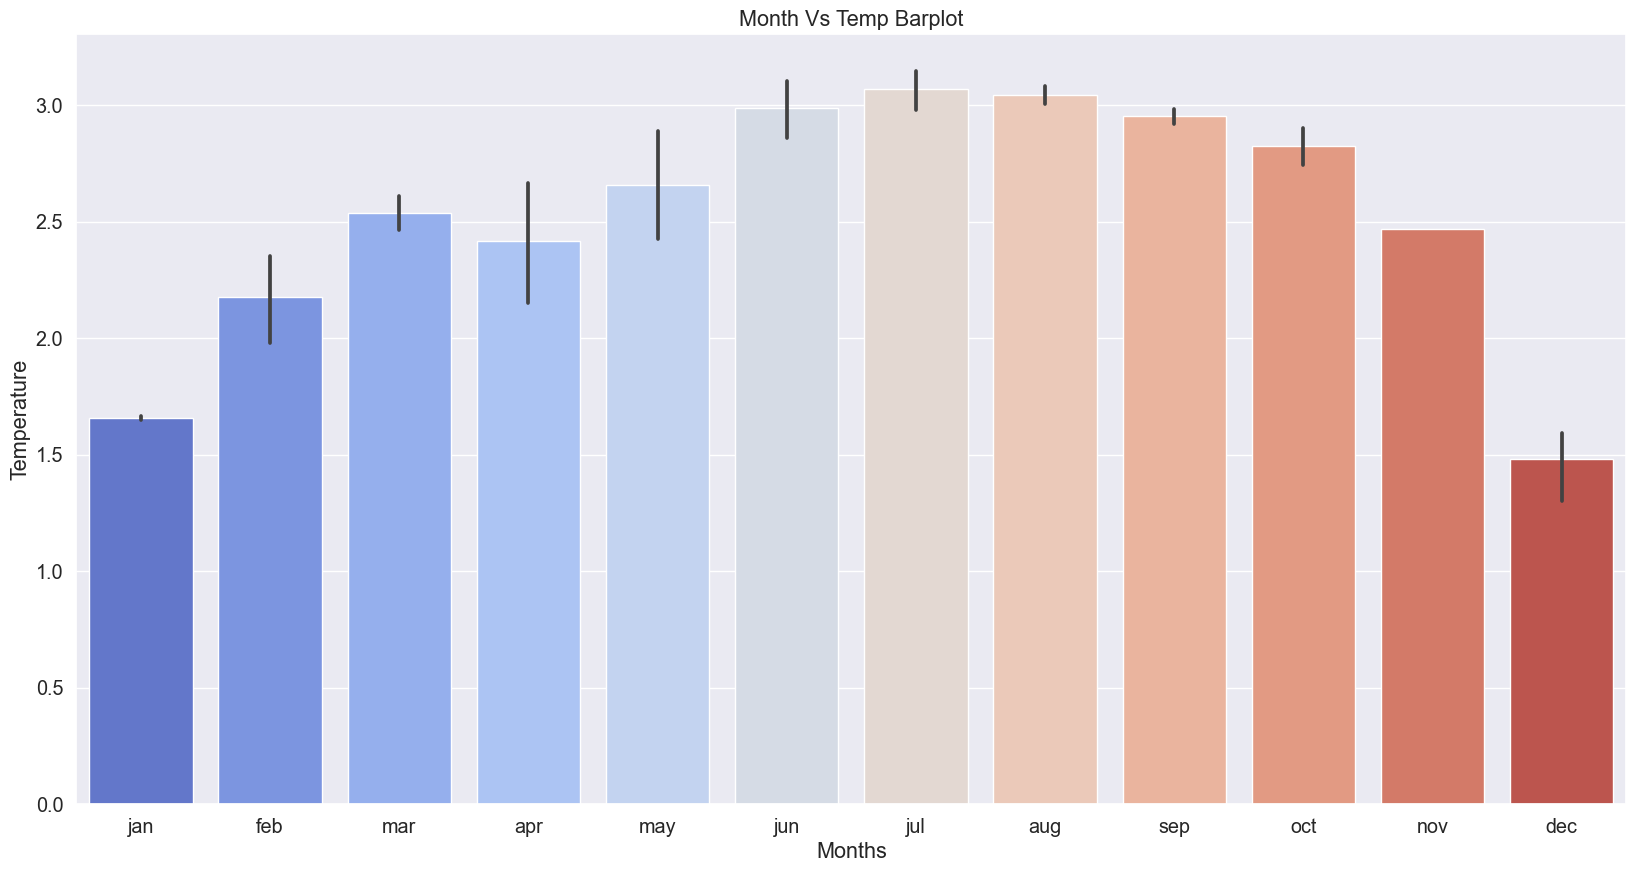

In [36]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

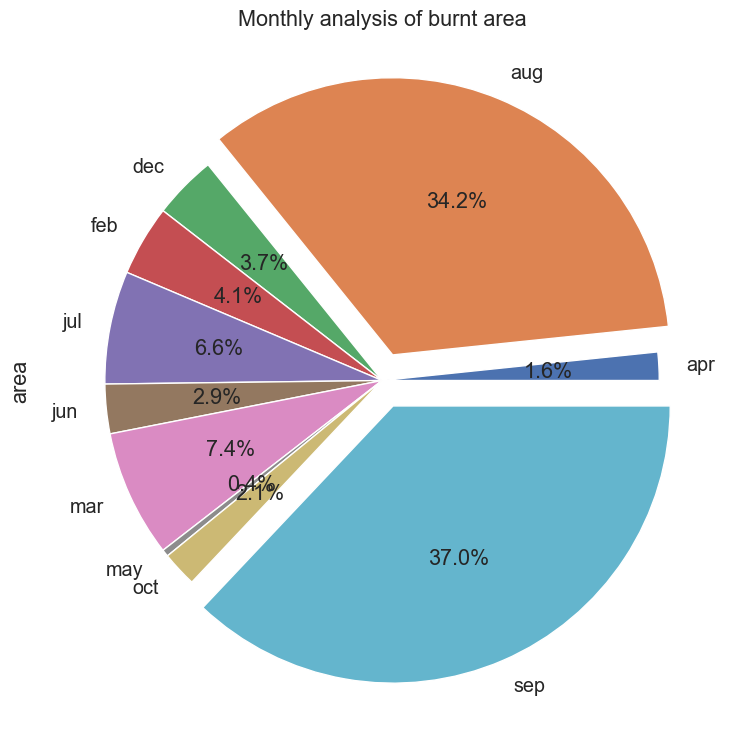

In [37]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=data[data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

In [38]:
df1=data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,% Small Forest Fire,% Large Forest Fire
January,100.000000,0.000000
February,70.000000,30.000000
March,77.777778,22.222222
April,77.777778,22.222222
May,50.000000,50.000000
June,82.352941,17.647059
July,71.875000,28.125000
August,76.630435,23.369565
September,70.348837,29.651163
October,73.333333,26.666667


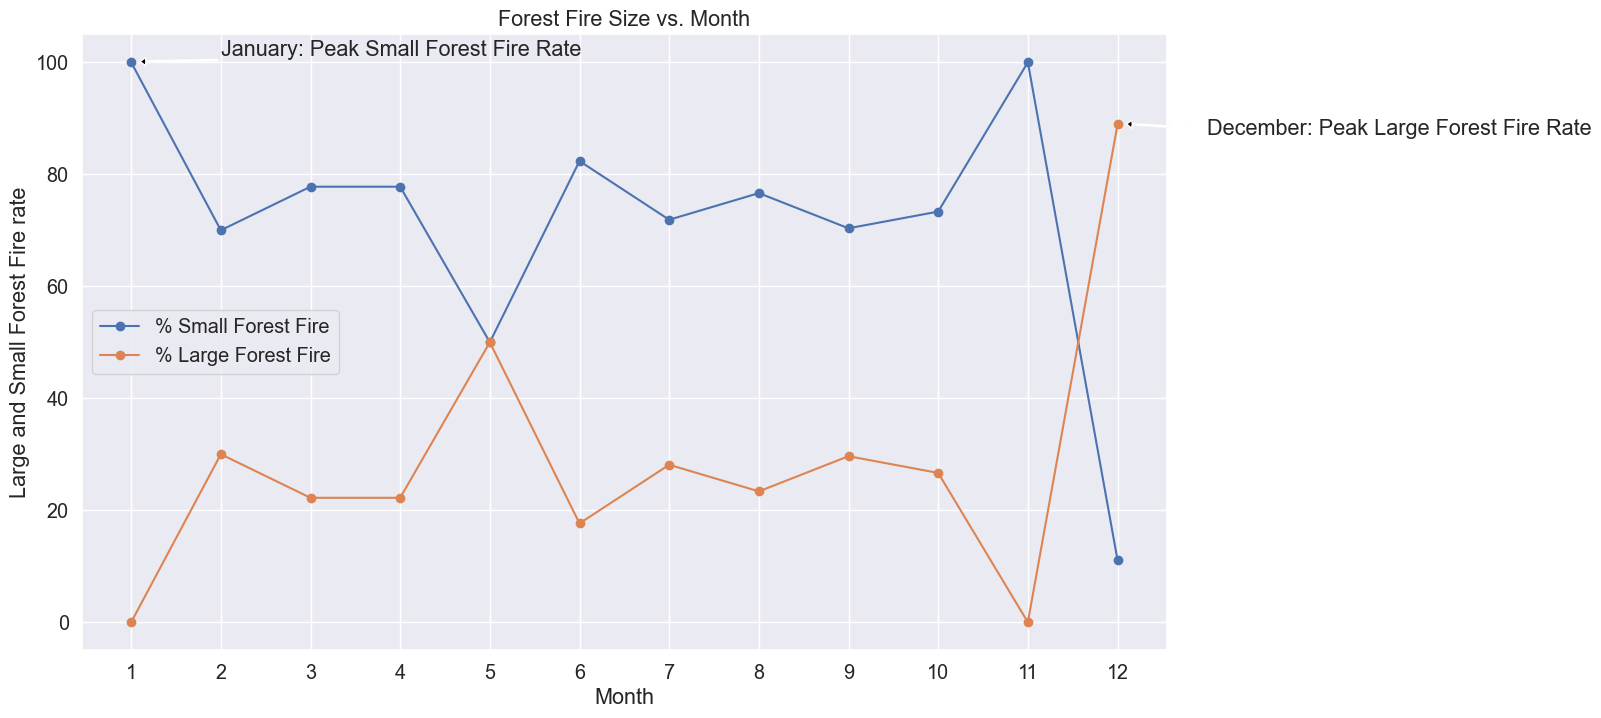

In [39]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


In [40]:
data_ = data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,-inf,1,...,0,0,0,1,0,0,0,0,0,0
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,-inf,0,...,0,1,0,0,0,0,0,0,1,0
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,-inf,0,...,0,1,0,0,0,1,0,0,0,0
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,-inf,1,...,0,0,0,1,0,0,0,0,0,0
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,-inf,0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

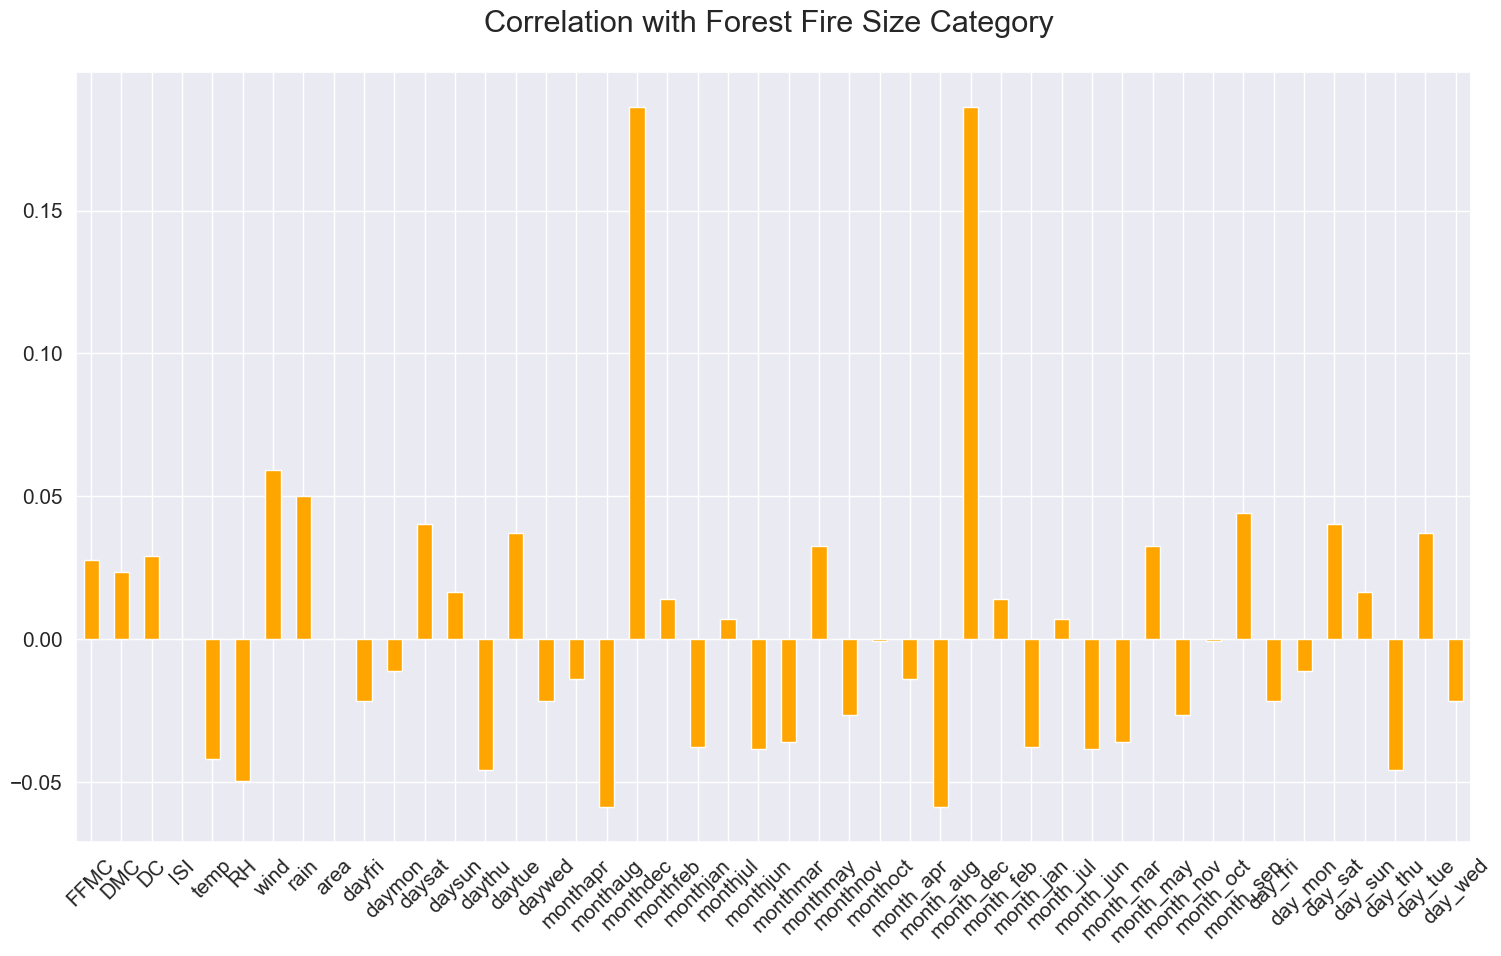

In [41]:
df=data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [42]:
data.size_category.unique()

array(['small', 'large'], dtype=object)

In [43]:
countsizesmall = len(data[data.size_category == 'small'])
countsizelarge = len(data[data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [44]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

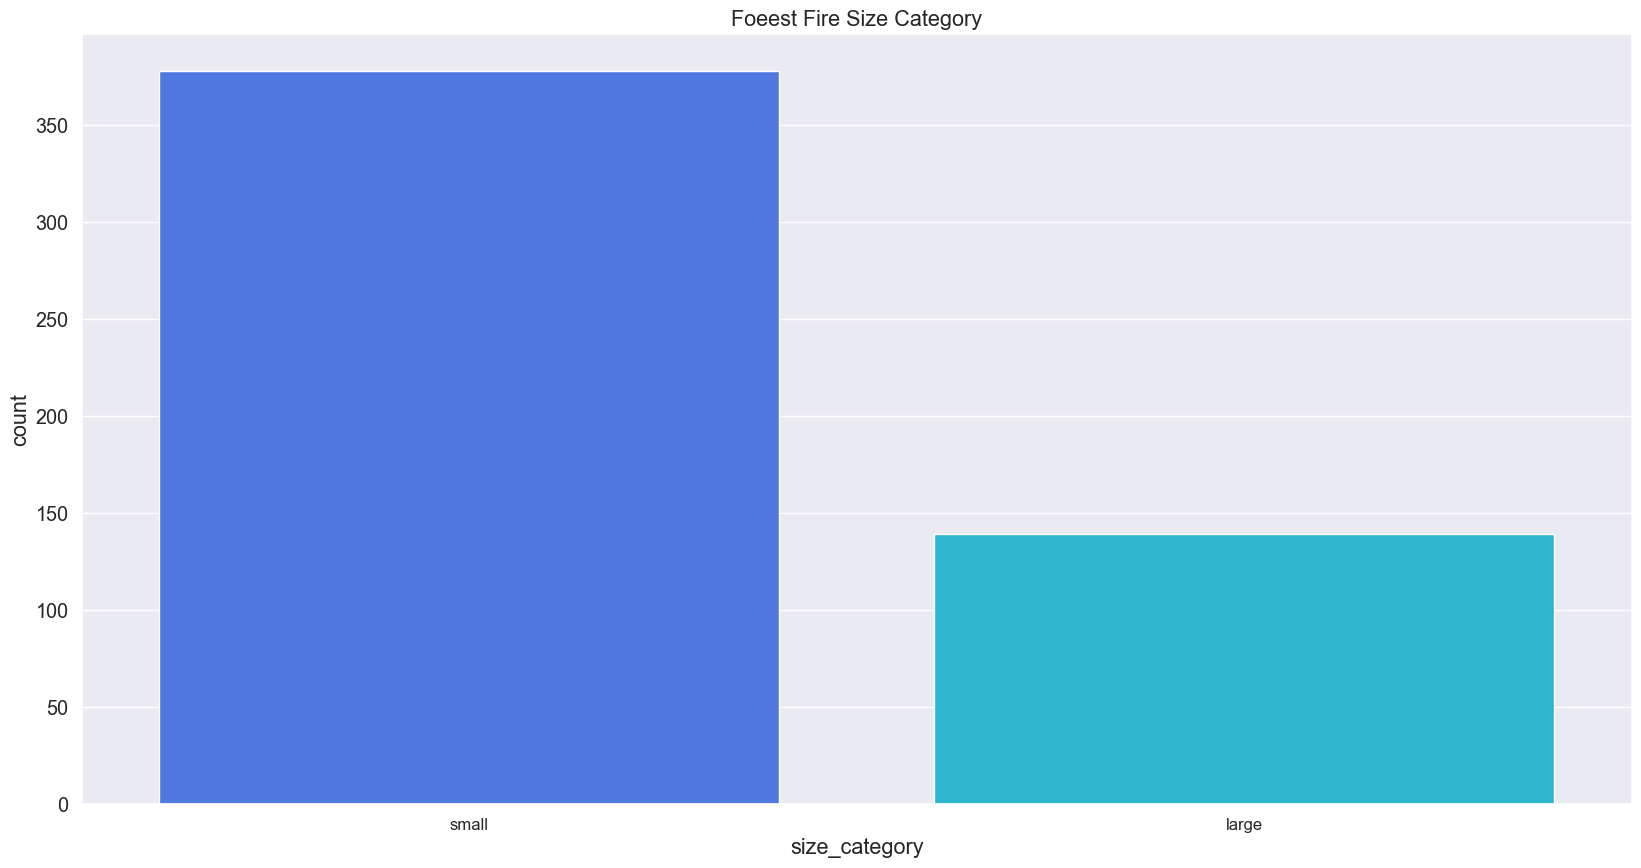

In [45]:

pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=data, palette = pal, 
              order=data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

In [46]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 28


In [47]:
data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,-inf,1,...,0,0,0,0,0,1,0,0,0,0
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,-inf,0,...,0,0,0,0,0,0,0,0,1,0
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,-inf,0,...,0,0,0,0,0,0,0,0,1,0
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,-inf,1,...,0,0,0,0,0,1,0,0,0,0
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,-inf,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.401829,4.037774,6.500689,0.641854,3.325036,3.465736,2.7,0.0,1.862529,0,...,0,0,0,0,0,0,0,0,0,0
513,4.401829,4.037774,6.500689,0.641854,3.086487,4.262680,5.8,0.0,3.994340,0,...,0,0,0,0,0,0,0,0,0,0
514,4.401829,4.037774,6.500689,0.641854,3.054001,4.248495,6.7,0.0,2.412336,0,...,0,0,0,0,0,0,0,0,0,0
515,4.547541,4.983607,6.421134,2.424803,3.242592,3.737670,4.0,0.0,-inf,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_standard_scaled = data.copy()
features = df_standard_scaled[continuous_feature]

In [49]:
df_standard_scaled.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [50]:
features

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,-inf,1,...,0,0,0,0,0,1,0,0,0,0
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,-inf,0,...,0,0,0,0,0,0,0,0,1,0
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,-inf,0,...,0,0,0,0,0,0,0,0,1,0
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,-inf,1,...,0,0,0,0,0,1,0,0,0,0
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,-inf,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.401829,4.037774,6.500689,0.641854,3.325036,3.465736,2.7,0.0,1.862529,0,...,0,0,0,0,0,0,0,0,0,0
513,4.401829,4.037774,6.500689,0.641854,3.086487,4.262680,5.8,0.0,3.994340,0,...,0,0,0,0,0,0,0,0,0,0
514,4.401829,4.037774,6.500689,0.641854,3.054001,4.248495,6.7,0.0,2.412336,0,...,0,0,0,0,0,0,0,0,0,0
515,4.547541,4.983607,6.421134,2.424803,3.242592,3.737670,4.0,0.0,-inf,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data['area']

0          -inf
1          -inf
2          -inf
3          -inf
4          -inf
         ...   
512    1.862529
513    3.994340
514    2.412336
515        -inf
516        -inf
Name: area, Length: 517, dtype: float64

In [52]:
data['area'].replace(['-inf'], [0], inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    float64
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [54]:
data.drop(['month','day','area'] ,axis=1, inplace= True)

In [55]:
data_ = data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
data_['size_category'] = df1.size_category
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,small
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,small
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,small


In [57]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,1
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [77]:

data_ = data_.dropna()

In [58]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [59]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.401829,4.037774,6.500689,0.641854,3.325036,3.465736,2.7,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
513,4.401829,4.037774,6.500689,0.641854,3.086487,4.262680,5.8,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
514,4.401829,4.037774,6.500689,0.641854,3.054001,4.248495,6.7,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
515,4.547541,4.983607,6.421134,2.424803,3.242592,3.737670,4.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
X.isnull().sum()

FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
dtype: int64

In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [81]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

In [82]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [85]:
tuner.search(X_train, Y_train,epochs=100,validation_data=(X_test, Y_test))

Trial 5 Complete [00h 00m 49s]
val_accuracy: 0.7307692170143127

Best val_accuracy So Far: 0.7307692170143127
Total elapsed time: 00h 04m 25s


In [119]:
def toFindBestParams(X_train, Y_train, X_test, Y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(X_train, Y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(X_train, Y_train, X_test, Y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.2686980664730072
batch_size: 5 - epochs: 10 Accuracy: 0.2686980664730072
batch_size: 5 - epochs: 50 Accuracy: 0.2686980664730072
batch_size: 5 - epochs: 100 Accuracy: 0.2686980664730072
batch_size: 10 - epochs: 5 Accuracy: 0.2686980664730072
batch_size: 10 - epochs: 10 Accuracy: 0.2686980664730072
batch_size: 10 - epochs: 50 Accuracy: 0.2686980664730072
batch_size: 10 - epochs: 100 Accuracy: 0.2686980664730072
batch_size: 15 - epochs: 5 Accuracy: 0.2686980664730072
batch_size: 15 - epochs: 10 Accuracy: 0.2686980664730072
batch_size: 15 - epochs: 50 Accuracy: 0.2686980664730072
batch_size: 15 - epochs: 100 Accuracy: 0.2686980664730072
batch_size: 20 - epochs: 5 Accuracy: 0.2686980664730072
batch_size: 20 - epochs: 10 Accuracy: 0.2686980664730072
batch_size: 20 - epochs: 50 Accuracy: 0.2686980664730072
batch_size: 20 - epochs: 100 Accuracy: 0.2686980664730072


In [129]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim = X_train.shape[1], kernel_initializer='normal', activation='tanh'))
#odel.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(X_train, Y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: nan - accuracy: 0.3527 - val_loss: nan - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 8/100
25/25 [==============================] - 0

25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 64/100
25/25 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 65/100
25/25 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 66/100
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 67/100
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2656 - val_loss: nan - val_accuracy: 0.2750
Epoch 68/100
25/25 [==============================] - 0s 5ms/

In [130]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2689
accuracy: 26.89%


In [131]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

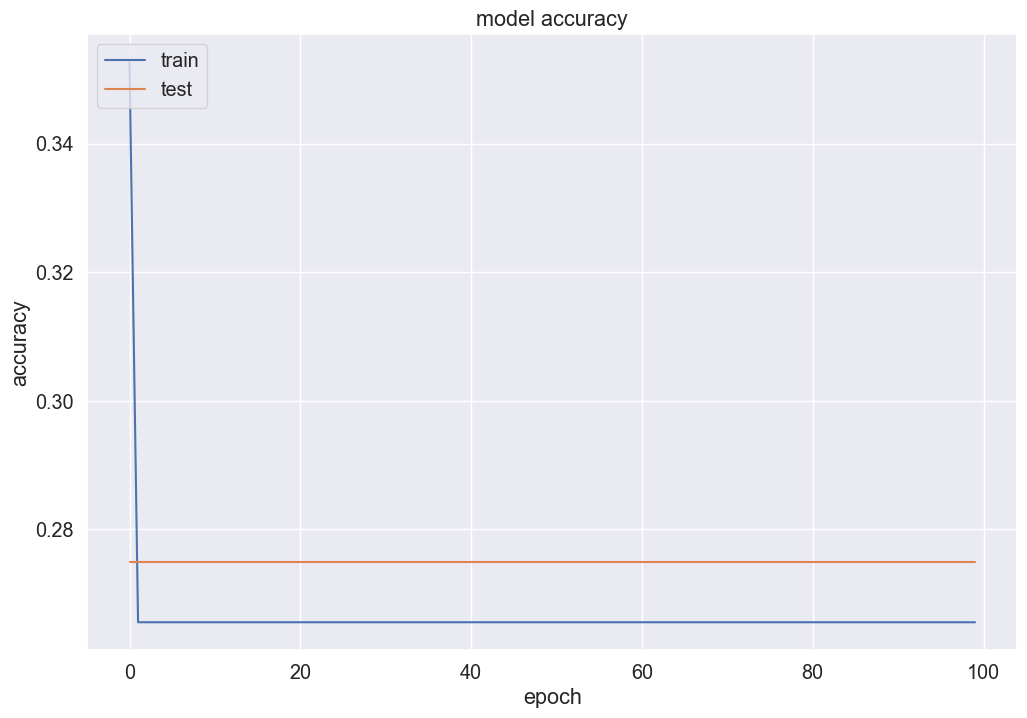

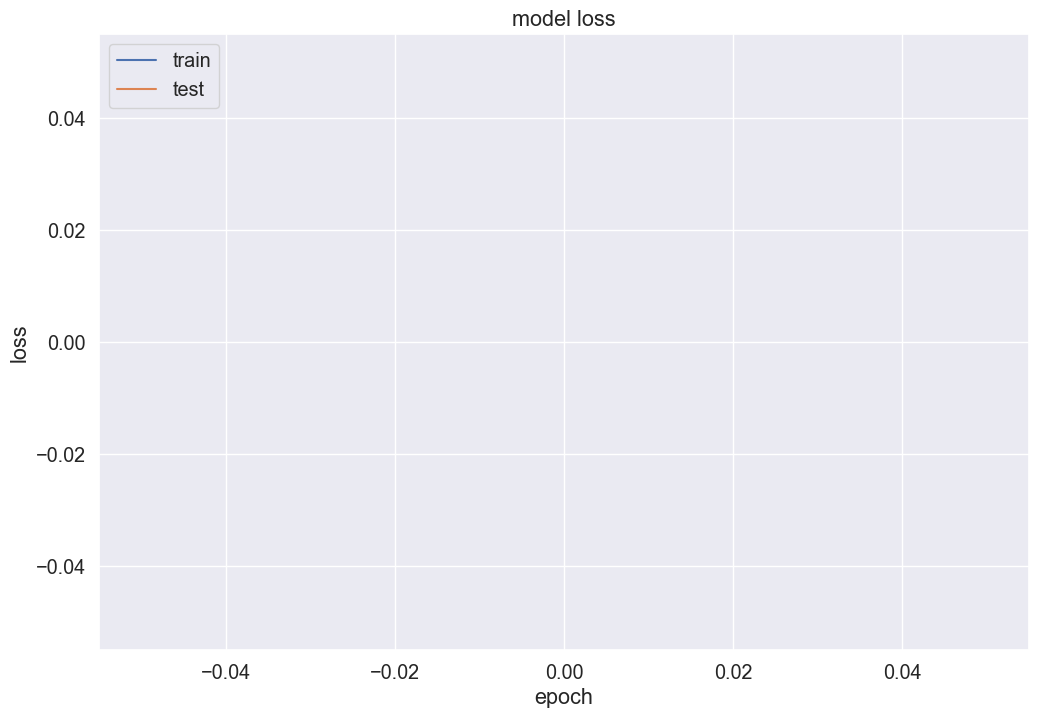

In [132]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()